<a href="https://colab.research.google.com/github/VidhyaKishor27/Pythonbasic/blob/main/Miniproject_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import glob
import pandas as pd
from tabulate import tabulate
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Python MiniProjects/Miniproject 7'
csv_files = glob.glob(path + "/*.csv")
df_list = [pd.read_csv(file) for file in csv_files]
big_df=pd.concat(df_list,ignore_index=True)
print(big_df.head(3))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
            Type                       Date Part of a policing operation  \
0  Person search  2019-07-01T00:02:43+00:00                        False   
1  Person search  2019-07-01T00:39:19+00:00                        False   
2  Person search  2019-07-01T01:11:57+00:00                        False   

   Policing operation   Latitude  Longitude Gender Age range  \
0                 NaN  52.390821  -2.169897   Male   over 34   
1                 NaN  52.365964  -2.192521   Male     25-34   
2                 NaN  52.111560  -1.919568   Male     10-17   

                              Self-defined ethnicity  \
0  White - English/Welsh/Scottish/Northern Irish/...   
1        Other ethnic group - Any other ethnic group   
2  White - English/Welsh/Scottish/Northern Irish/...   

  Officer-defined ethnicity  ... Month Reported by Falls within Location  \
0       

Part 1 Questions:
1. Top 10 Type by # events. Type column is the event (see sample data in the end of this document ).
Output:
type, num_events, rank


In [12]:
top10_type=big_df.groupby(['Type'])['Type'].size().to_frame('Num_Event').sort_values(by='Num_Event', ascending=False).reset_index()
top10_type['Rank']=top10_type['Num_Event'].rank(ascending=False)
print(top10_type)
df1=big_df.to_csv()

                        Type  Num_Event  Rank
0              Person search      17275   1.0
1  Person and Vehicle search       4555   2.0
2             Vehicle search        596   3.0


2. Top 10 Ethnics by # events. Use column “Officer-defined ethnicity”
Output:
type, office_num_events, office_ethnic_rank


In [17]:
top10_ethnics=big_df.groupby(['Type','Officer-defined ethnicity'])['Officer-defined ethnicity'].count().to_frame('Num_Event').sort_values(by='Num_Event',ascending=False).reset_index()
top10_ethnics['Rank']=top10_ethnics['Num_Event'].rank(ascending=False)
print(top10_ethnics.head(10))

                        Type Officer-defined ethnicity  Num_Event  Rank
0              Person search                     White      12172   1.0
1  Person and Vehicle search                     White       2970   2.0
2              Person search                     Black       1389   3.0
3              Person search                     Asian       1193   4.0
4  Person and Vehicle search                     Asian        663   5.0
5  Person and Vehicle search                     Black        494   6.0
6              Person search                     Other        317   7.0
7              Person search                     Mixed         95   8.0
8  Person and Vehicle search                     Other         93   9.0
9             Vehicle search                     White         65  10.0


3. Top 10 Ethnics by # events. Use column “Self-defined ethnicity”
Output:
type, self_num_events, self_ethnic_rank


In [18]:
top10_self=big_df.groupby(['Type','Self-defined ethnicity'])['Self-defined ethnicity'].count().to_frame('Num_Event').sort_values(by='Num_Event',ascending=False).reset_index()
top10_self['Rank']=top10_ethnics['Num_Event'].rank(ascending=False)
print(tabulate(top10_self.head(10),headers=['Type','Self-defined ethnicity','No. of Events','Rank'],tablefmt='grid'))


+----+---------------------------+--------------------------------------------------------------------------------------+-----------------+--------+
|    | Type                      | Self-defined ethnicity                                                               |   No. of Events |   Rank |
+====+===========================+======================================================================================+=================+========+
|  0 | Person search             | White - English/Welsh/Scottish/Northern Irish/British                                |           11049 |      1 |
+----+---------------------------+--------------------------------------------------------------------------------------+-----------------+--------+
|  1 | Person and Vehicle search | White - English/Welsh/Scottish/Northern Irish/British                                |            2580 |      2 |
+----+---------------------------+------------------------------------------------------------------------

4. Merge 2 and 3 above on type.
Output:
type, office_num_events, office_ethnic_rank, self_num_events, self_ethnic_rank


In [21]:
merged_df=top10_ethnics.merge(top10_self,on='Type',how='inner')
print(tabulate(merged_df.head(10),headers=['Type','Officer-defined ethnicity','Office_Num_Event','Office_Rank','Self-defined ethnicity','Self_Num_Events','Self_Rank'],tablefmt='grid'))


+----+---------------+-----------------------------+--------------------+---------------+--------------------------------------------------------------------------------------+-------------------+-------------+
|    | Type          | Officer-defined ethnicity   |   Office_Num_Event |   Office_Rank | Self-defined ethnicity                                                               |   Self_Num_Events |   Self_Rank |
+====+===============+=============================+====================+===============+======================================================================================+===================+=============+
|  0 | Person search | White                       |              12172 |             1 | White - English/Welsh/Scottish/Northern Irish/British                                |             11049 |           1 |
+----+---------------+-----------------------------+--------------------+---------------+-------------------------------------------------------------------

5. Top 10 Type by Gender = Male.
Output:
type, num_events_men, rank_men
6. Top 10 Type by Gender = Female.
Output:
type, num_events_men, rank_women



In [5]:
men=big_df[big_df['Gender']=='Male']
women=big_df[big_df['Gender']=='Female']
top10_men=men.groupby(['Type'])['Type'].count().to_frame('Num_Event_Men').sort_values(by='Num_Event_Men', ascending=False).reset_index()
top10_men['Rank']=top10_men['Num_Event_Men'].rank(ascending=False)
print(tabulate(top10_men.head(10),headers=['Type','Num_Event_Men','Men_Rank'],tablefmt='grid'))
top10_women=women.groupby(['Type'])['Type'].count().to_frame('Num_Event_women').sort_values(by='Num_Event_women', ascending=False).reset_index()
top10_women['Rank']=top10_women['Num_Event_women'].rank(ascending=False)
print(tabulate(top10_women.head(10),headers=['Type','Num_Event_women','Women_Rank'],tablefmt='grid'))

+----+---------------------------+-----------------+------------+
|    | Type                      |   Num_Event_Men |   Men_Rank |
+====+===========================+=================+============+
|  0 | Person search             |           13714 |          1 |
+----+---------------------------+-----------------+------------+
|  1 | Person and Vehicle search |            3855 |          2 |
+----+---------------------------+-----------------+------------+
|  2 | Vehicle search            |              11 |          3 |
+----+---------------------------+-----------------+------------+
+----+---------------------------+-------------------+--------------+
|    | Type                      |   Num_Event_women |   Women_Rank |
+====+===========================+===================+==============+
|  0 | Person search             |              1619 |            1 |
+----+---------------------------+-------------------+--------------+
|  1 | Person and Vehicle search |               362 |  

7. Group bar chart plot (vertical) with output from 5 and 6.
[1][2]
Bar 1 -> Male
Bar 2 -> Female


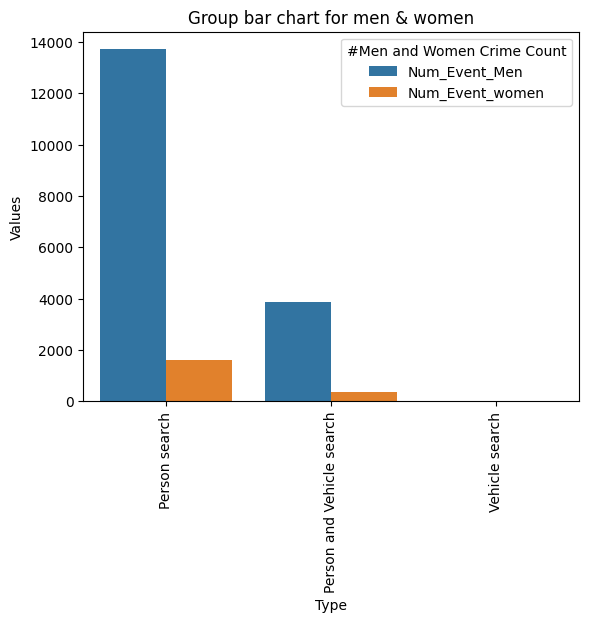

In [13]:
df2=top10_men.merge(top10_women,on='Type',how='inner')
#print(df2)
del df2['Rank_x']
del df2['Rank_y']
df3=df2.melt("Type",var_name="#Men and Women Crime Count",value_name="Values")
#print(df3)
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Type',y='Values',hue='#Men and Women Crime Count',data=df3)
plt.xticks(rotation=90)
plt.title("Group bar chart for men & women")
plt.show()


8. For Gender = Male, # events by “Age range”
Output:
type, age_range_male, num_events_male, rank_male
9. For Gender = Female, # events by “Age range”
Output:
type, age_range_female, num_events_female, rank_female
10.  Merge 8 and 9 on column “type”
Output:
type, age_range_male, num_events_male, rank_male, age_range_female, num_events_female, rank_female


In [7]:
top10_men_agerange=men.groupby(['Type','Age range'])['Type'].count().to_frame('Num_Event_Men').sort_values(by='Num_Event_Men', ascending=False).reset_index()
top10_men_agerange['Rank']=top10_men_agerange['Num_Event_Men'].rank(ascending=False)
print(tabulate(top10_men_agerange.head(10),headers=['Type','Age Range','Num_Event_Men','Men_Rank'],tablefmt='grid'))
top10_women_agerange=women.groupby(['Type','Age range'])['Type'].count().to_frame('Num_Event_women').sort_values(by='Num_Event_women', ascending=False).reset_index()
top10_women_agerange['Rank']=top10_women_agerange['Num_Event_women'].rank(ascending=False)
print(tabulate(top10_women_agerange.head(10),headers=['Type','Age Range','Num_Event_women','Women_Rank'],tablefmt='grid'))
male_female=top10_men_agerange.merge(top10_women_agerange,on='Type',how='inner')
print(tabulate(male_female,headers=['Type','Age Range_Male','Num_Event_men','men_Rank','Age Range_Female','Num_Event_women','women_Rank'],tablefmt='grid'))


+----+---------------------------+-------------+-----------------+------------+
|    | Type                      | Age Range   |   Num_Event_Men |   Men_Rank |
+====+===========================+=============+=================+============+
|  0 | Person search             | 18-24       |            3905 |          1 |
+----+---------------------------+-------------+-----------------+------------+
|  1 | Person search             | 10-17       |            3023 |          2 |
+----+---------------------------+-------------+-----------------+------------+
|  2 | Person search             | over 34     |            2941 |          3 |
+----+---------------------------+-------------+-----------------+------------+
|  3 | Person search             | 25-34       |            2655 |          4 |
+----+---------------------------+-------------+-----------------+------------+
|  4 | Person and Vehicle search | 18-24       |            1468 |          5 |
+----+---------------------------+------

Part 2:

1. The file "Employee_start_time_end_time.csv" contains the start and end times for employees' daily work shifts. The file "hour_range_slot_for_pay.csv" specifies the pay rate applicable based on the number of hours worked for a particular day. For example, if an employee works for 4 hours on a given day, the applicable pay rate is $10 per hour, as 4 hours falls within the range of 1 to 5 hours (see row 1 in the "hour_range_slot_for_pay.csv" file). If an employee works for 7 hours on a given day, the pay rate is $12 per hour, as it falls within the range of 6 to 10 hours (see row 2 in the "hour_range_slot_for_pay.csv" file). Using these criteria, you need to calculate the total pay in USD for each employee based on the provided information from the two CSV files.


In [8]:
import pandas as pd
import numpy as np
import glob
from tabulate import tabulate
from google.colab import drive
drive.mount('/content/drive')
emp = pd.read_csv('/content/drive/MyDrive/Python MiniProjects/Miniproject7-part2/employee_start_time_end_time.csv')
emp[['start_time', 'end_time']] = emp[['start_time', 'end_time']].apply(pd.to_datetime)
hrs=pd.read_csv('/content/drive/MyDrive/Python MiniProjects/Miniproject7-part2/hour_range_slot_for_pay.csv')
print(emp.head(3))
print(hrs)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   employee_id          start_time            end_time
0            1 2022-03-01 09:10:00 2022-03-01 17:10:00
1            2 2022-03-01 08:10:00 2022-03-01 17:10:00
2            3 2022-03-01 06:00:00 2022-03-01 17:10:00
   daily_hour_min_range  daily_hour_max_range  pay_per_hour_usd
0                     1                     5                10
1                     6                    10                12
2                    11                   100                20


In [9]:
emp['hours_diff'] = (emp.end_time - emp.start_time) / pd.Timedelta(hours=1)
print(emp.head(10))


   employee_id          start_time            end_time  hours_diff
0            1 2022-03-01 09:10:00 2022-03-01 17:10:00    8.000000
1            2 2022-03-01 08:10:00 2022-03-01 17:10:00    9.000000
2            3 2022-03-01 06:00:00 2022-03-01 17:10:00   11.166667
3            4 2022-03-01 06:10:00 2022-03-01 17:10:00   11.000000
4            5 2022-03-01 05:10:00 2022-03-01 17:10:00   12.000000
5            6 2022-03-01 08:10:00 2022-03-01 17:10:00    9.000000
6            7 2022-03-01 07:10:00 2022-03-01 17:10:00   10.000000
7            1 2022-03-02 06:10:00 2022-03-02 17:10:00   11.000000
8            2 2022-03-02 05:10:00 2022-03-02 17:10:00   12.000000
9            3 2022-03-02 08:10:00 2022-03-02 17:10:00    9.000000
